# Areas and movements

## Libraries

In [1]:
import networkx as nx
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import overpy
import geojsonio as gjs
import json
import ipyleaflet as ipy
import osmnx as ox
from shapely.geometry import Point, LineString, Polygon 
from descartes import PolygonPatch 
from IPython.display import IFrame 

In [2]:
ox.config(log_console=True, use_cache=True)

## Areas

This dataset contains Spain divided in geospatial areas, including population, perimeters of the areas, surface of the areas, and name of each district.

In [3]:
noviembre_pols = gpd.read_file('../Pablo/noviembre_pols.geojson')
noviembre_pols = noviembre_pols.drop(['rowid','objectid_1','id_grupo'],axis=1)
noviembre_pols.head()

,objectid,sum_pob_as,shape_leng,name_celda,shape__area,shape__length,geometry
0,2585,11395,53268.077784,Cartagena (distrito 05),6.457586e+07,53268.077784,"MULTIPOLYGON (((-0.90576 37.64752, -0.90567 37..."
1,1589,6609,176455.378779,Belalcázar y otros municipios,7.979909e+08,176455.378779,"MULTIPOLYGON (((-4.86709 38.65973, -4.86693 38..."
2,261,5508,93715.435696,Navarrés y otros municipios,2.971162e+08,93715.435696,"MULTIPOLYGON (((-0.66458 39.10707, -0.66041 39..."
3,1257,5161,98840.385938,Casavieja y otros municipios,3.121015e+08,98840.385938,"MULTIPOLYGON (((-4.89526 40.41188, -4.89504 40..."
4,3178,16920,21437.000417,Palma de Mallorca (SCD Number 5-B),6.731973e+06,21437.000417,"MULTIPOLYGON (((2.70288 39.54769, 2.70390 39.5..."


In [4]:
noviembre_pols.sort_values(by=['objectid'])

,objectid,sum_pob_as,shape_leng,name_celda,shape__area,shape__length,geometry
1038,1,7682,35771.338209,"Montesinos, Los y Algorfa",5.101956e+07,35771.338210,"MULTIPOLYGON (((-0.76203 38.07029, -0.76203 38..."
2052,2,14354,63295.634626,Sant Joan de Vilatorrada y otros municipios,8.100284e+07,63295.634626,"MULTIPOLYGON (((1.80187 41.79711, 1.80187 41.7..."
346,3,5071,120439.774794,Fuentidueña de Tajo y otros municipios,2.772914e+08,120439.774794,"MULTIPOLYGON (((-3.06791 40.15767, -3.06791 40..."
1483,4,6756,262576.084345,"Real de la Jara, El y otros municipios",8.967069e+08,262576.084345,"MULTIPOLYGON (((-5.95369 37.99535, -5.95369 37..."
1650,5,6218,18204.294363,Daimús y otros municipios,6.805165e+06,18204.294363,"MULTIPOLYGON (((-0.13299 38.96818, -0.13299 38..."
...,...,...,...,...,...,...,...
988,3210,25905,57162.204527,"Ejido, El (sección 012 y otras secciones del d...",1.432570e+08,57162.204527,"MULTIPOLYGON (((-2.71831 36.81474, -2.71753 36..."
2825,3211,26937,53344.139708,"Ejido, El (sección 018 y otras secciones del d...",7.984844e+07,53344.139709,"MULTIPOLYGON (((-2.82276 36.80805, -2.82276 36..."
259,3212,30215,8082.826024,Mijas (sección 019 y otras secciones del distr...,3.066283e+06,8082.826024,"MULTIPOLYGON (((-4.63140 36.54773, -4.63106 36..."
1316,3213,24342,52181.860994,Mijas (sección 026 y otras secciones del distr...,1.078331e+08,52181.860994,"MULTIPOLYGON (((-4.59704 36.61183, -4.59682 36..."


In [14]:
noviembre_pols[noviembre_pols['objectid']==2585]

,objectid,sum_pob_as,shape_leng,name_celda,shape__area,shape__length,geometry
0,2585,11395,53268.077784,Cartagena (distrito 05),6.457586e+07,53268.077784,"MULTIPOLYGON (((-0.90576 37.64752, -0.90567 37..."


In [15]:
noviembre_pols.to_file("../Datasets/shapes.geojson", driver='GeoJSON')

## Movements

This dataset shows the streams of people from one site to another in the November 2019.

In [2]:
noviembre = gpd.read_file('../Pablo/noviembre.geojson')
noviembre = noviembre.drop(['rowid','objectid'],axis=1)
noviembre.head()

,celda_destino,celda_origen,flujo,n_destino,nombre_celda_destino,nombre_celda_origen,p_pob_casa,p_pob_sale,pob_casa,pob_resid,pob_sale,geometry
0,002A,001A,107,101,Formentera del Segura y otros municipios,"Montesinos, Los y Algorfa","61,77","38,23",4882,7903,3021,"LINESTRING (-0.77723 38.04169, -0.74723 38.09734)"
1,023A,001A,463,101,Almoradí,"Montesinos, Los y Algorfa","61,77","38,23",4882,7903,3021,"LINESTRING (-0.77723 38.04169, -0.79547 38.09948)"
2,058A,001A,983,101,Rojales,"Montesinos, Los y Algorfa","61,77","38,23",4882,7903,3021,"LINESTRING (-0.77723 38.04169, -0.71885 38.07398)"
3,061A,001A,213,101,San Miguel de Salinas,"Montesinos, Los y Algorfa","61,77","38,23",4882,7903,3021,"LINESTRING (-0.77723 38.04169, -0.80311 37.97484)"
4,091A,001A,167,101,Orihuela (distrito 05),"Montesinos, Los y Algorfa","61,77","38,23",4882,7903,3021,"LINESTRING (-0.77723 38.04169, -0.85410 37.97972)"


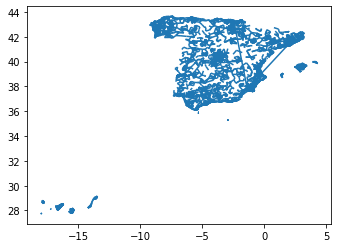

In [7]:
noviembre.plot()

In [9]:
noviembre.to_file("../Datasets/movements.geojson", driver='GeoJSON')